# INTRODUCTION

In [ ]:
# I Will Uncover the factors that lead to employee attrition and explore important questions such 
# as ‘show me a breakdown of distance from home by job role and attrition’ or 
# ‘compare average monthly income by education and attrition’.

## Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read The Data 

In [2]:
df = pd.read_csv(r'C:\Users\dell\Downloads\portfolio\PYTHON PROJECTS\HR Employee Attrition.csv')

In [3]:
df.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,Y,Yes,11,3,8,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,Y,No,23,4,10,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,Y,Yes,15,3,7,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,Y,Yes,11,3,8,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,Y,No,12,3,6,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,...,Y,No,13,3,8,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,...,Y,Yes,20,4,12,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,...,Y,No,22,4,1,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,...,Y,No,21,4,10,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,...,Y,No,13,3,17,2,7,7,7,7


In [ ]:
### Hints of Some Columns
# Depending on the source of the data, these columns indicate the following:
# (Education) 1 'Below College 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor .
# (EnvironmentSatisfaction) 1 'Low' 2 'Medium' 3 'High' 4 'Very High' .
# (JobInvolvement) 1 'Low' 2 'Medium' 3 'High' 4 'Very High' .
# (JobSatisfaction) 1 'Low' 2 'Medium' 3 'High' 4 'Very High' .
# (PerformanceRating) 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding' .
# (RelationshipSatisfaction) 1 'Low' 2 'Medium' 3 'High' 4 'Very High' .
# (WorkLifeBalance) 1 'Bad' 2 'Good' 3 'Better' 4 'Best' .

## Exploring And Cleaning The Data

<AxesSubplot:>

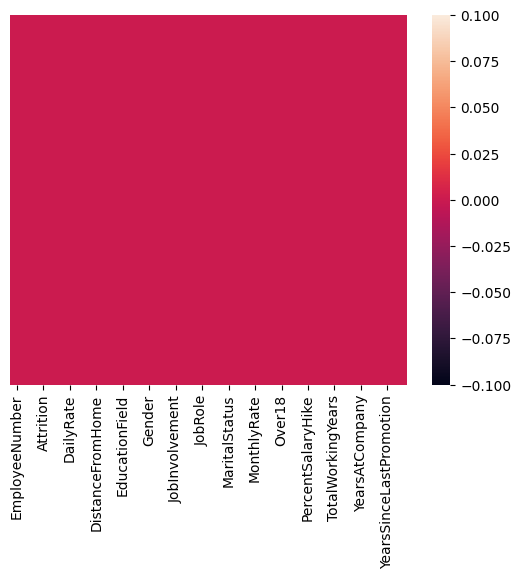

In [4]:
## heatmap for null values
sns.heatmap(df.isnull(), yticklabels=False)

In [5]:
df.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,14313.103401,2.693197,15.209524,3.153741,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,7117.786044,2.498009,3.659938,0.360824,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,2094.000000,0.000000,11.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,8047.000000,1.000000,12.000000,3.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,14235.500000,2.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,20461.500000,4.000000,18.000000,3.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,26999.000000,9.000000,25.000000,4.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeNumber           1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   Attrition                1470 non-null   object
 3   BusinessTravel           1470 non-null   object
 4   DailyRate                1470 non-null   int64 
 5   Department               1470 non-null   object
 6   DistanceFromHome         1470 non-null   int64 
 7   Education                1470 non-null   int64 
 8   EducationField           1470 non-null   object
 9   EnvironmentSatisfaction  1470 non-null   int64 
 10  Gender                   1470 non-null   object
 11  HourlyRate               1470 non-null   int64 
 12  JobInvolvement           1470 non-null   int64 
 13  JobLevel                 1470 non-null   int64 
 14  JobRole                  1470 non-null  

Text(0.5, 1.0, 'Different Ages Of Employees')

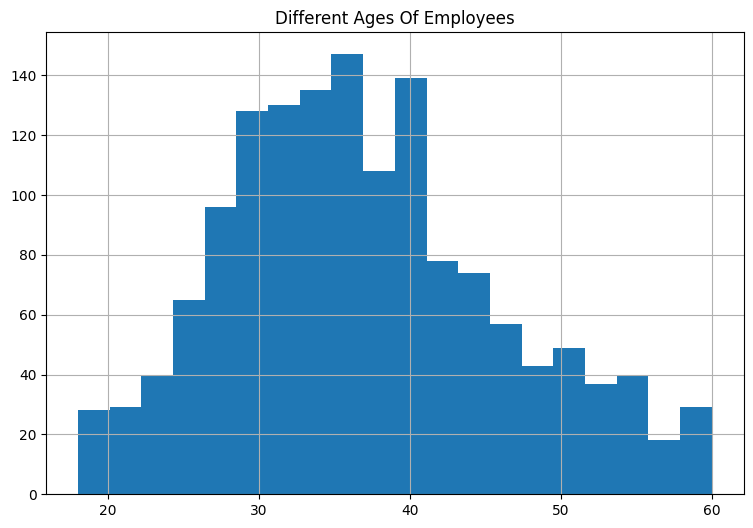

In [7]:
df.hist(column='Age' , figsize=(9,6) , bins=20)
plt.title('Different Ages Of Employees')

## Correlation

In [8]:
df.corr(method='pearson').round(2)

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.00,-0.01,-0.05,0.03,0.04,0.02,0.03,-0.01,-0.02,-0.05,...,0.01,-0.00,-0.01,-0.02,-0.01,0.01,-0.01,-0.01,-0.01,-0.01
Age,-0.01,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,...,0.03,0.30,0.00,0.00,0.68,-0.02,0.31,0.21,0.22,0.20
DailyRate,-0.05,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,...,-0.03,0.04,0.02,0.00,0.01,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,0.03,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,...,0.03,-0.03,0.04,0.03,0.00,-0.03,0.01,0.02,0.01,0.01
Education,0.04,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,...,-0.03,0.13,-0.01,-0.02,0.15,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.02,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,...,0.04,0.01,-0.03,-0.03,-0.00,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.03,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,...,-0.02,0.02,-0.01,-0.00,-0.00,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,-0.01,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,...,-0.02,0.02,-0.02,-0.03,-0.01,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,-0.02,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,...,0.04,0.14,-0.03,-0.02,0.78,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.05,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,...,0.00,-0.06,0.02,0.00,-0.02,-0.02,-0.00,-0.00,-0.02,-0.03


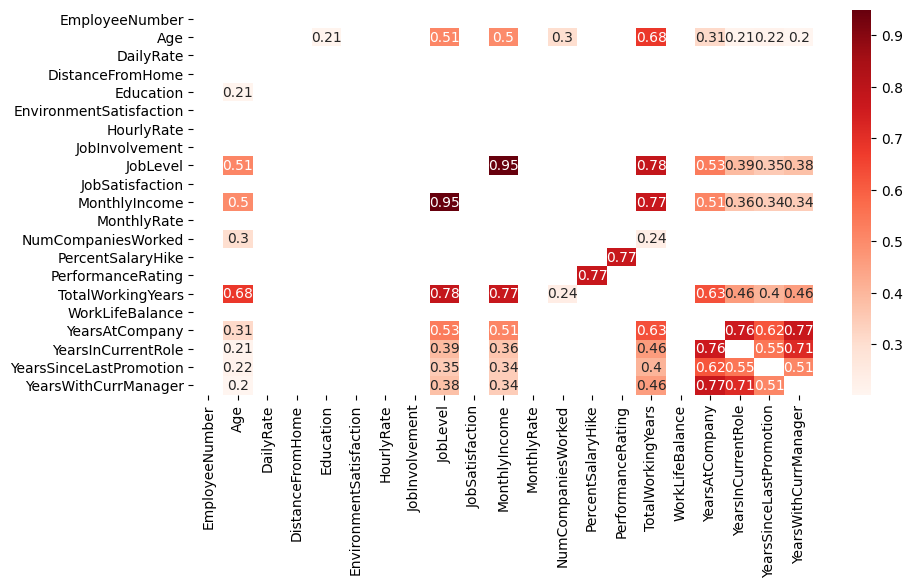

In [9]:
corr_matrix = df.corr().abs()
threshold = 0.2
filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
plt.figure(figsize=(10,5))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

In [10]:
## Correlation When Attrition Is Yes
attrition_yes = df.loc[df.Attrition == 'Yes']
corr_att_yes = attrition_yes.corr().round(2)
corr_att_yes

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.00,0.05,-0.04,0.06,0.08,0.05,0.06,0.11,0.01,-0.11,...,-0.01,-0.00,-0.07,-0.04,-0.01,0.01,0.01,-0.01,0.01,0.00
Age,0.05,1.00,0.01,0.03,0.19,-0.03,0.11,0.07,0.50,0.03,...,-0.07,0.35,-0.02,-0.03,0.67,-0.08,0.45,0.38,0.33,0.34
DailyRate,-0.04,0.01,1.00,-0.08,-0.05,-0.02,0.08,0.04,0.02,0.01,...,-0.14,0.09,-0.05,-0.01,0.00,0.03,-0.07,-0.04,-0.07,-0.02
DistanceFromHome,0.06,0.03,-0.08,1.00,0.04,0.02,-0.01,0.04,0.08,-0.05,...,0.01,-0.12,0.14,0.10,0.00,-0.06,-0.03,-0.04,-0.01,-0.01
Education,0.08,0.19,-0.05,0.04,1.00,-0.04,0.02,0.11,0.11,-0.08,...,-0.00,0.06,0.02,-0.01,0.17,-0.10,0.16,0.10,0.14,0.13
EnvironmentSatisfaction,0.05,-0.03,-0.02,0.02,-0.04,1.00,-0.02,0.09,-0.08,0.05,...,0.03,-0.17,0.05,-0.00,-0.06,-0.10,0.03,0.01,0.10,0.00
HourlyRate,0.06,0.11,0.08,-0.01,0.02,-0.02,1.00,0.07,0.02,-0.12,...,-0.02,-0.01,-0.06,-0.04,0.03,-0.07,0.02,-0.05,-0.09,-0.01
JobInvolvement,0.11,0.07,0.04,0.04,0.11,0.09,0.07,1.00,0.00,-0.05,...,-0.00,-0.02,-0.01,-0.03,0.01,0.04,-0.03,-0.01,0.03,0.03
JobLevel,0.01,0.50,0.02,0.08,0.11,-0.08,0.02,0.00,1.00,0.03,...,0.07,0.18,-0.12,-0.12,0.74,-0.01,0.61,0.53,0.44,0.47
JobSatisfaction,-0.11,0.03,0.01,-0.05,-0.08,0.05,-0.12,-0.05,0.03,1.00,...,0.15,-0.03,-0.15,-0.14,-0.00,-0.04,0.10,0.06,0.09,0.01


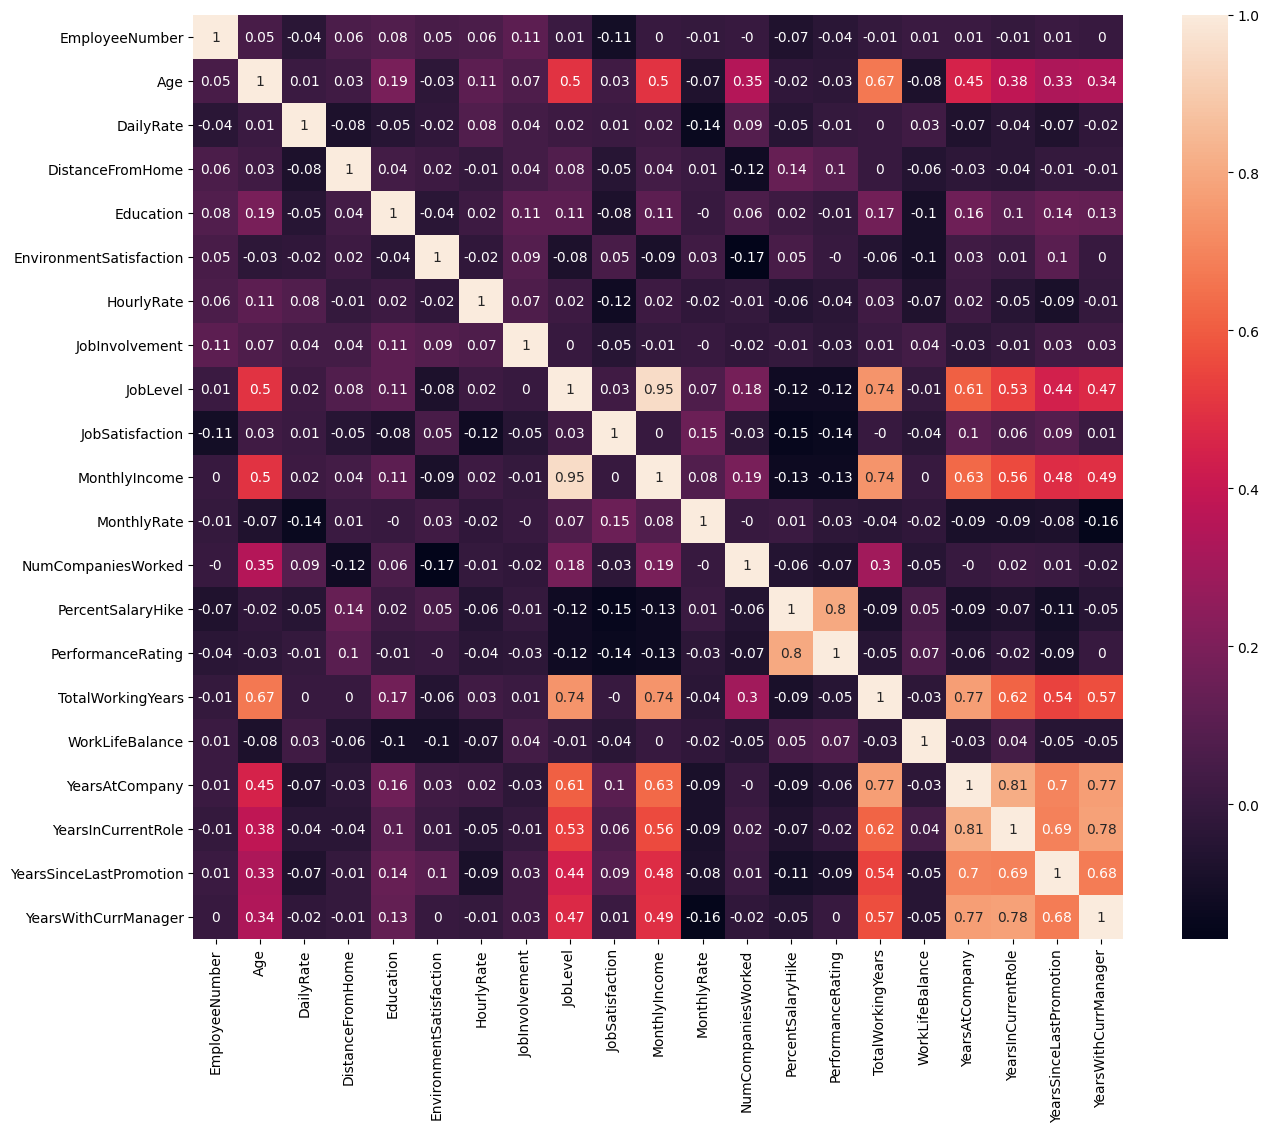

In [11]:
plt.figure(figsize=(15,12))
attrition = sns.heatmap(corr_att_yes , annot=True)
plt.show()

In [12]:
## Correlation When Attrition is No
attrition_no = df.loc[df.Attrition == 'No']
corr_att_no = attrition_no.corr().round(2)
corr_att_no

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,1.00,-0.02,-0.05,0.03,0.03,0.01,0.03,-0.03,-0.03,-0.03,...,0.02,0.00,-0.00,-0.02,-0.02,0.01,-0.02,-0.01,-0.01,-0.01
Age,-0.02,1.00,0.00,0.01,0.21,-0.00,0.01,-0.01,0.50,-0.03,...,0.05,0.30,0.01,0.01,0.67,-0.02,0.26,0.16,0.19,0.15
DailyRate,-0.05,0.00,1.00,0.02,-0.01,0.02,0.01,0.04,-0.01,0.03,...,-0.01,0.03,0.04,0.00,0.01,-0.06,-0.04,0.01,-0.03,-0.04
DistanceFromHome,0.03,0.01,0.02,1.00,0.02,-0.01,0.04,0.01,0.01,0.02,...,0.03,-0.01,0.02,0.01,0.02,-0.01,0.03,0.04,0.02,0.03
Education,0.03,0.21,-0.01,0.02,1.00,-0.03,0.02,0.02,0.10,-0.00,...,-0.03,0.14,-0.02,-0.03,0.14,0.03,0.05,0.05,0.04,0.05
EnvironmentSatisfaction,0.01,-0.00,0.02,-0.01,-0.03,1.00,-0.06,-0.05,-0.01,-0.03,...,0.04,0.06,-0.05,-0.04,-0.01,0.05,-0.02,0.00,-0.01,-0.03
HourlyRate,0.03,0.01,0.01,0.04,0.02,-0.06,1.00,0.04,-0.04,-0.06,...,-0.02,0.03,0.00,0.01,-0.01,0.01,-0.03,-0.02,-0.02,-0.02
JobInvolvement,-0.03,-0.01,0.04,0.01,0.02,-0.05,0.04,1.00,-0.04,-0.03,...,-0.02,0.03,-0.02,-0.03,-0.04,-0.04,-0.04,-0.01,-0.04,0.00
JobLevel,-0.03,0.50,-0.01,0.01,0.10,-0.01,-0.04,-0.04,1.00,-0.03,...,0.04,0.15,-0.02,-0.01,0.78,0.04,0.51,0.35,0.34,0.34
JobSatisfaction,-0.03,-0.03,0.03,0.02,-0.00,-0.03,-0.06,-0.03,-0.03,1.00,...,-0.03,-0.06,0.05,0.03,-0.05,-0.02,-0.04,-0.03,-0.04,-0.05


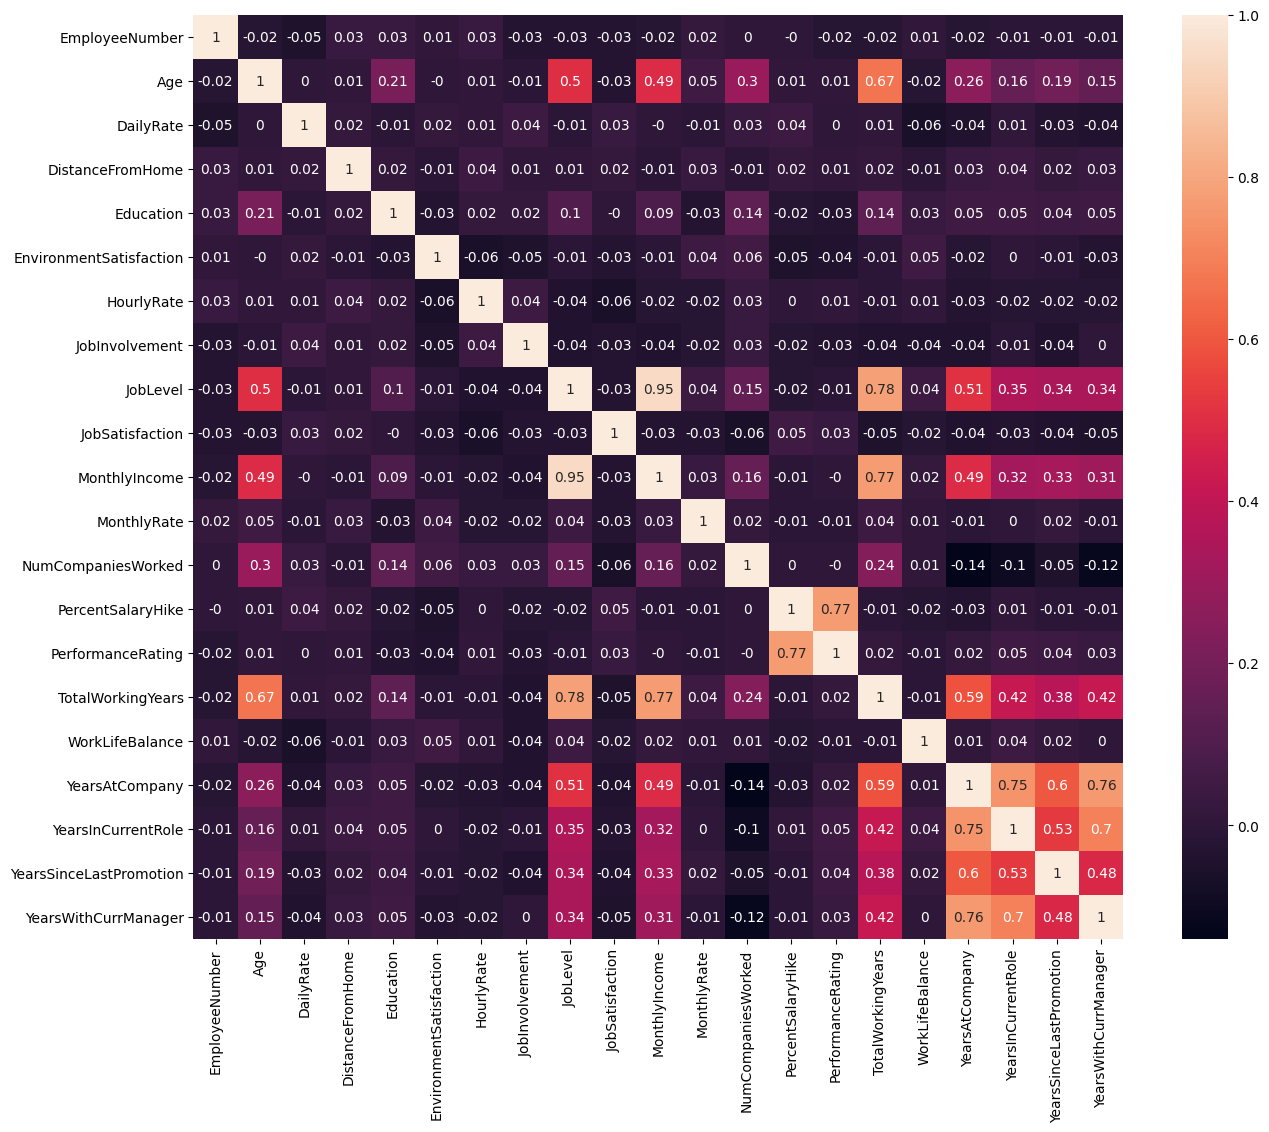

In [13]:
plt.figure(figsize=(15,12))
attrition = sns.heatmap(corr_att_no , annot=True)
plt.show()

In [14]:
df.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,Y,Yes,11,3,8,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,Y,No,23,4,10,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,Y,Yes,15,3,7,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,Y,Yes,11,3,8,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,Y,No,12,3,6,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,...,Y,No,13,3,8,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,...,Y,Yes,20,4,12,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,...,Y,No,22,4,1,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,...,Y,No,21,4,10,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,...,Y,No,13,3,17,2,7,7,7,7


Text(0.5, 1.0, 'DistanceFromHome')

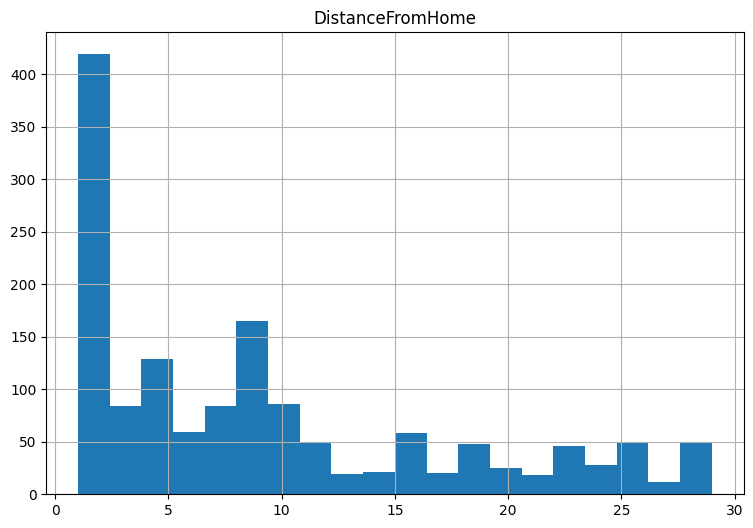

In [15]:
df.hist(column='DistanceFromHome' , figsize=(9,6) , bins=20)
plt.title('DistanceFromHome')

## Analysis

In [ ]:
## Relation Between Distance From Home and Attriation

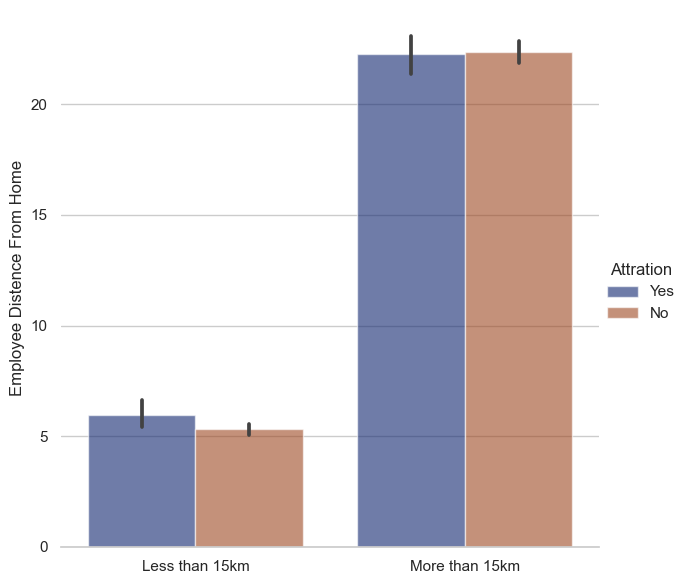

In [16]:
df['distance'] = df['DistanceFromHome'].apply(lambda x : 'Less than 15km' if x<=15 else 
                                        'More than 15km')
sns.set_theme(style="whitegrid")
cat = sns.catplot(
    data=df, kind="bar",
    x="distance", y="DistanceFromHome", hue="Attrition",
     palette="dark", alpha=.6, height=6)
cat.despine(left=True , top=True)
cat.set_axis_labels("", "Employee Distence From Home")
cat.legend.set_title("Attration")

In [ ]:
## It is clear that the distance to work does not directly affect the rates of attrition

In [ ]:
## compare average monthly income by education and attrition

In [17]:
df_MonthlyIncome = df.groupby(['Education','Attrition'], as_index = False)['MonthlyIncome'].mean()
df_MonthlyIncome

,Education,Attrition,MonthlyIncome
0,1,No,5926.129496
1,1,Yes,4360.161290
2,2,No,6586.058824
3,2,Yes,4282.545455
4,3,No,6882.919662
5,3,Yes,4770.242424
6,4,No,7087.814706
7,4,Yes,5335.155172
8,5,No,8559.906977
9,5,Yes,5850.200000


<AxesSubplot:xlabel='Education'>

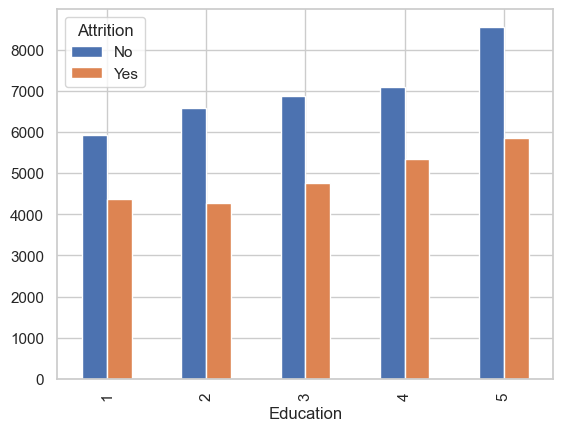

In [18]:
df_MonthlyIncome.pivot(index='Education',columns ='Attrition',
                       values='MonthlyIncome').plot(kind='bar', stacked=False)

In [ ]:
# (Education):- 1 'Below College 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor .
## Employees With Lowest Average Mothly Income Have The Highest Rate Of Attrition

In [19]:
df.head(10)

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,distance
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,Yes,11,3,8,1,6,4,0,5,Less than 15km
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,No,23,4,10,3,10,7,1,7,Less than 15km
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,Yes,15,3,7,3,0,0,0,0,Less than 15km
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,Yes,11,3,8,3,8,7,3,0,Less than 15km
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,No,12,3,6,3,2,2,2,2,Less than 15km
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,...,No,13,3,8,2,7,7,3,6,Less than 15km
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,...,Yes,20,4,12,2,1,0,0,0,Less than 15km
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,...,No,22,4,1,3,1,0,0,0,More than 15km
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,...,No,21,4,10,3,9,7,1,8,More than 15km
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,...,No,13,3,17,2,7,7,7,7,More than 15km


In [20]:
df_yes = df[df['Attrition'] == 'Yes'] 
df_yes

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,distance
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,Yes,11,3,8,1,6,4,0,5,Less than 15km
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,Yes,15,3,7,3,0,0,0,0,Less than 15km
14,15,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,...,Yes,14,3,6,3,4,2,0,3,More than 15km
21,22,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,...,No,23,4,10,3,5,3,0,3,Less than 15km
24,25,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,...,No,11,3,8,3,4,2,1,3,Less than 15km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,1439,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,...,No,19,3,1,2,1,0,1,0,Less than 15km
1442,1443,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,...,Yes,14,3,4,4,2,2,2,2,Less than 15km
1444,1445,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,...,No,11,3,14,1,10,9,9,8,Less than 15km
1452,1453,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,...,No,12,3,12,3,6,3,0,1,Less than 15km


In [21]:
df_no = df[df['Attrition'] == 'No'] 
df_no

,EmployeeNumber,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,distance
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,No,23,4,10,3,10,7,1,7,Less than 15km
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,Yes,11,3,8,3,8,7,3,0,Less than 15km
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,No,12,3,6,3,2,2,2,2,Less than 15km
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,...,No,13,3,8,2,7,7,3,6,Less than 15km
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,...,Yes,20,4,12,2,1,0,0,0,Less than 15km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,No,17,3,17,3,5,2,0,3,More than 15km
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,No,15,3,9,3,7,7,1,7,Less than 15km
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,Yes,20,4,6,3,6,2,0,3,Less than 15km
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,No,14,3,17,2,9,6,0,8,Less than 15km


In [ ]:
## Attration VS Overtime

In [22]:
df_yes['OverTime'].value_counts()

Yes    127
No     110
Name: OverTime, dtype: int64

In [23]:
df_no['OverTime'].value_counts()

No     944
Yes    289
Name: OverTime, dtype: int64

In [ ]:
## --Employees who dont work overtime They have a rate 
## almost three times lower than employees who work overtime
### that means overtime affect directely in Attration

In [ ]:
## Attrtion VS EnvironmentSatisfaction
# (EnvironmentSatisfaction) 1 'Low' 2 'Medium' 3 'High' 4 'Very High' .

In [24]:
num = df_no['EnvironmentSatisfaction'].value_counts()
num

3    391
4    386
2    244
1    212
Name: EnvironmentSatisfaction, dtype: int64

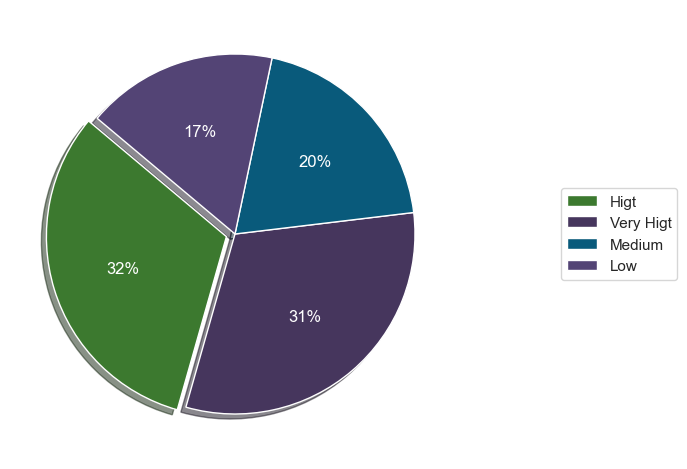

In [27]:
import random
fig = plt.figure(figsize=(8,5),dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
# pie chart
types = {'Higt' : '3' , 'Very Higt' : '4' , 'Medium' : '2' , 'Low' : '1'}
colors = []
for i in range(4):
    rgp = (random.uniform(0,.5),random.uniform(0,.5),random.uniform(0,.5))
    colors.append(rgp)
explode = [0] * 4
explode[0] = 0.05
wedges , texts , autotexts = plt.pie(num , explode=explode ,labels = types, colors=colors , autopct='%1.0f%%'
                                    , shadow = True , startangle=140 , textprops=dict(color='w'))
plt.legend(wedges , types , loc='right' , bbox_to_anchor=(1 , 0 , .5 , 1))

In [ ]:
## Employees with no Attration have more satisfaction rates with environment

In [ ]:
### relation between gender and martial status VS attration 

In [28]:
## Attrition
ge_ms_yes_df = df_yes.groupby(['Attrition','Gender','MaritalStatus'], as_index=False)['EmployeeNumber'].count()
ge_ms_yes_df

,Attrition,Gender,MaritalStatus,EmployeeNumber
0,Yes,Female,Divorced,9
1,Yes,Female,Married,31
2,Yes,Female,Single,47
3,Yes,Male,Divorced,24
4,Yes,Male,Married,53
5,Yes,Male,Single,73


In [29]:
## yes attrition
ge_ms_no_df = df_no.groupby(['Attrition','Gender','MaritalStatus'], as_index=False)['EmployeeNumber'].count()
ge_ms_no_df

,Attrition,Gender,MaritalStatus,EmployeeNumber
0,No,Female,Divorced,108
1,No,Female,Married,241
2,No,Female,Single,152
3,No,Male,Divorced,186
4,No,Male,Married,348
5,No,Male,Single,198


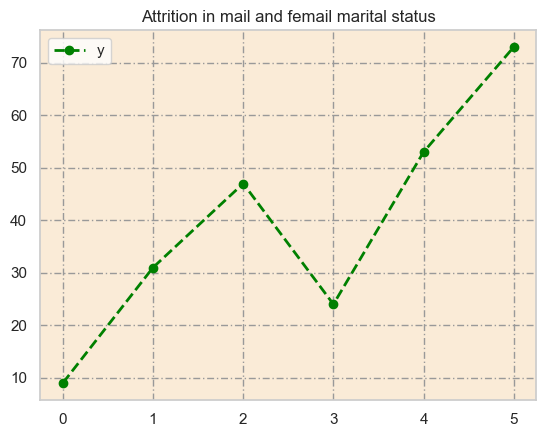

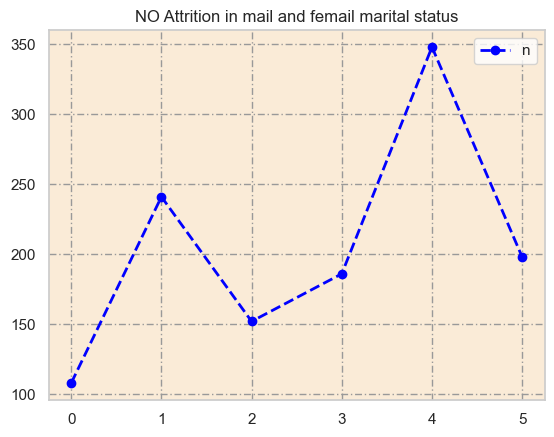

In [30]:
axes_1 = ge_ms_yes_df.plot(color='green', marker='.', linestyle='dashed',
     linewidth=2, markersize=12)
axes_1.legend('y')
axes_1.set_title('Attrition in mail and femail marital status')
axes_1.grid(True , color='0.6' , dashes=(5,2,1,2))
axes_1.set_facecolor('#FAEBD7')
axes_2 = ge_ms_no_df.plot( color='blue', marker='.', linestyle='dashed',
     linewidth=2, markersize=12)
plt.legend('n')
axes_2.set_title('NO Attrition in mail and femail marital status')
axes_2.grid(True , color='0.6' , dashes=(5,2,1,2))
axes_2.set_facecolor('#FAEBD7')
plt.show()

In [ ]:
## The highest rates of attrition occur when the male is single and the female is single
## On the contrary, we find that the married male or female have the lowest rates of attrition

## Conclusion and Recommendations

In [ ]:
## --It is clear that there is a strong correlation between the increase in the employee's income
## rate and the satisfaction rate in the company

## --So It is more likely that the employee will
## continue in his position if he has greater financial freedom
## --Also, by referring to the data, we see that employees who work overtime are more likely to
## attrition than other employees

## --The work environment also has a significant impact on the employees
## We see that the employee's satisfaction with the work environment is directly
## proportional to the full satisfaction with the job
## --Also, the employee's social status has an
## impact on his performance and satisfaction rate

## Married male or female employees have greater productivity
## and continuity than single or divorced employees
